#### **Langchain with Langsmith Tracing**

In [1]:
# Importing the required libraries and packages
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate,PromptTemplate
from langchain_core.output_parsers import StrOutputParser,JsonOutputParser
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
load_dotenv()

USER_AGENT environment variable not set, consider setting it to identify your requests.


True

In [2]:
# Setting the environment variables
os.environ['GROQ_API_KEY']=os.getenv("GROQ_API_KEY")
os.environ["LANGSMITH_API_KEY"]=os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING_V2"]="true"
os.environ["LANGSMITH_PROJECT"]=os.getenv("LANGSMITH_PROJECT")
os.environ["HUGGINGFACEHUB_API_TOKEN"] = os.getenv("HUGGINGFACEHUB_API_TOKEN")

In [3]:
# Loading the LLM model
llm_model = ChatGroq(model="llama-3.3-70b-versatile",temperature=0,max_retries=2)

In [4]:
# Inoked the input
result = llm_model.invoke("What is agentic AI ?")
print(result.content)

Agentic AI refers to artificial intelligence (AI) systems that are capable of autonomous decision-making, problem-solving, and action-taking, often with a degree of self-awareness, intentionality, and goal-directed behavior. These systems are designed to operate with a sense of agency, meaning they can perceive their environment, make decisions, and take actions to achieve their objectives, often without explicit human intervention.

Agentic AI systems typically possess the following characteristics:

1. **Autonomy**: They can operate independently, making decisions and taking actions without human oversight.
2. **Self-awareness**: They have a sense of their own existence, capabilities, and limitations.
3. **Goal-directed behavior**: They are designed to achieve specific objectives, and their actions are guided by these goals.
4. **Decision-making**: They can evaluate options, weigh risks and benefits, and make choices based on their programming and available data.
5. **Learning and ad

In [5]:
# Define the PromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        ("system","You are an expert Data Scientist and Gen AI Engineer. Provide me answers based on the asked question."),
        ("human","{input}")
    ]
)

In [6]:
# Create chain to get answer, when invoke
basic_chain = (
            prompt
            | llm_model)
result = basic_chain.invoke({"input","Top 5 Indian YT channels for learning ML,DS and GenAI."})
print(result.content)

Here are the top 5 Indian YouTube channels for learning Machine Learning (ML), Data Science (DS), and General Artificial Intelligence (GenAI):

1. **CodeWithHarry**: This channel, run by Harry, offers a wide range of tutorials and explanations on ML, DS, and GenAI. With over 1.5 million subscribers, it's one of the most popular Indian YouTube channels for learning these topics.

2. **Data Science**: This channel, run by Data Science, provides in-depth explanations and tutorials on various DS and ML topics, including Python programming, data visualization, and deep learning. It has over 750k subscribers.

3. **Great Learning**: Great Learning is a popular ed-tech platform that offers various courses on ML, DS, and GenAI. Their YouTube channel has over 1.2 million subscribers and features video lectures, tutorials, and explanations on these topics.

4. **Krish Naik**: Krish Naik is a well-known data scientist and YouTuber who creates content on ML, DS, and GenAI. His channel has over 500

In [7]:
# StringOutputParser --> Parse the output into string format
str_parser = StrOutputParser()
chain_with_parser = (
    prompt
    | llm_model
    | str_parser
)

result = chain_with_parser.invoke({"input","What is RAG explain in 5 bullet points."})
print(result)

RAG (Retrieval-Augmented Generation) is a type of artificial intelligence model that combines the strengths of retrieval-based and generation-based approaches. Here are 5 key points about RAG:

* **Retrieval-Augmented Generation**: RAG models use a combination of retrieval and generation techniques to produce output. They first retrieve relevant information from a database or knowledge graph, and then use this information to generate text or other types of output.
* **Improved Contextual Understanding**: RAG models can better understand the context of a given prompt or question by retrieving relevant information from a large corpus of text. This allows them to generate more accurate and informative responses.
* **Reducing Hallucinations**: RAG models can reduce the problem of "hallucinations" in generation-based models, where the model generates text that is not based on actual facts. By retrieving information from a database, RAG models can ensure that their output is grounded in real

In [8]:
# JSONOutputParser --> Parse the output into json format
json_parser = JsonOutputParser()
prompt = PromptTemplate(
    template="Answer the question and follow the below format instructions : {format_instructions} \n question : {question}",
    input_variables=["question"],
    partial_variables={"format_instructions":json_parser.get_format_instructions()}
)
print(json_parser.get_format_instructions())
chain_with_jsonparser = (
    prompt
    | llm_model
    | json_parser
)

result = chain_with_jsonparser.invoke({"input","Give me, Indian captains to win T20 world cup"})
print(result)

Return a JSON object.
{'response': 'MS Dhoni is the only Indian captain to win the T20 World Cup, which he achieved in 2007.', 'captains': ['MS Dhoni'], 'year': 2007}


In [9]:
result = chain_with_jsonparser.invoke({"input","Can you tell me about telecom companies, their founders and founding year in India"})
print(result)

{'telecom_companies': [{'name': 'Bharti Airtel', 'founder': 'Sunil Bharti Mittal', 'founding_year': 1995}, {'name': 'Reliance Jio', 'founder': 'Mukesh Ambani', 'founding_year': 2007}, {'name': 'Vodafone Idea', 'founder': 'Kumar Mangalam Birla', 'founding_year': 2018}, {'name': 'BSNL', 'founder': 'Government of India', 'founding_year': 2000}, {'name': 'MTNL', 'founder': 'Government of India', 'founding_year': 1986}, {'name': 'Tata Teleservices', 'founder': 'Ratan Tata', 'founding_year': 1996}, {'name': 'Idea Cellular', 'founder': 'Aditya Birla Group', 'founding_year': 1995}]}


In [10]:
result

{'telecom_companies': [{'name': 'Bharti Airtel',
   'founder': 'Sunil Bharti Mittal',
   'founding_year': 1995},
  {'name': 'Reliance Jio', 'founder': 'Mukesh Ambani', 'founding_year': 2007},
  {'name': 'Vodafone Idea',
   'founder': 'Kumar Mangalam Birla',
   'founding_year': 2018},
  {'name': 'BSNL', 'founder': 'Government of India', 'founding_year': 2000},
  {'name': 'MTNL', 'founder': 'Government of India', 'founding_year': 1986},
  {'name': 'Tata Teleservices',
   'founder': 'Ratan Tata',
   'founding_year': 1996},
  {'name': 'Idea Cellular',
   'founder': 'Aditya Birla Group',
   'founding_year': 1995}]}

Now just look at the langsmith tracing inside your project on langsmith website, you can able to trace the each query you invoke using llm model.

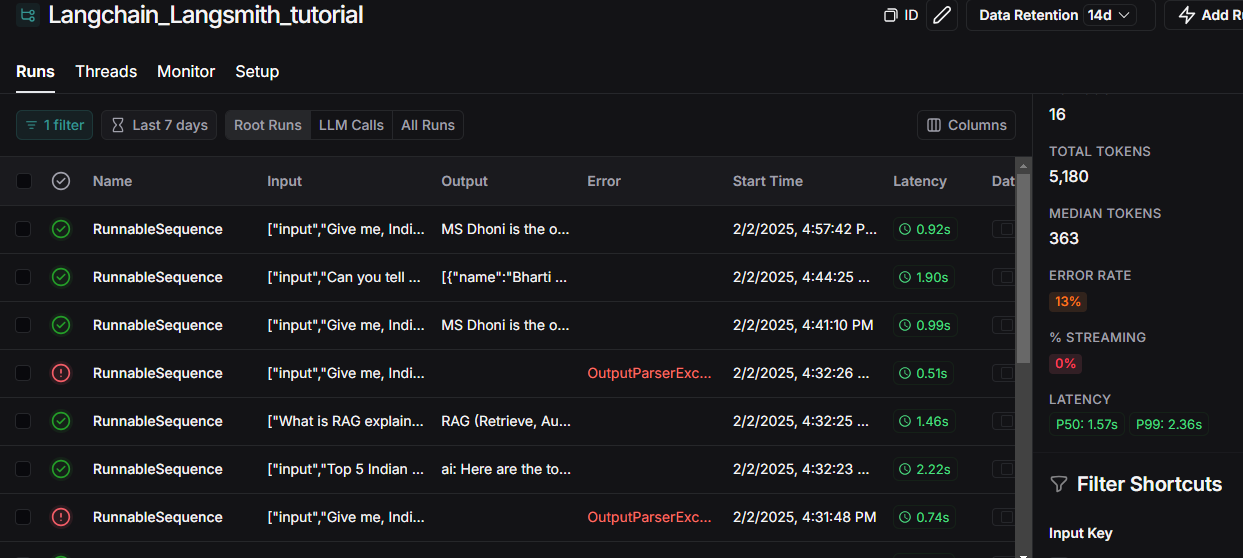

In [11]:
# RAG --> Implement RAG

# 1. Use web base loader to load the content
loader=WebBaseLoader("https://python.langchain.com/docs/introduction/")
documents = loader.load()

# 2. Split the content into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=50)
documents=text_splitter.split_documents(documents)


In [13]:
# 3. Load the embedding model 
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2",model_kwargs={'device': 'cpu'},encode_kwargs={'normalize_embeddings': False})

# 4. Store the chunks in vectordatabase with embedding model
vectorstoredb=FAISS.from_documents(documents,embeddings)

# 5. Perform similarity search for the input question in vectorestore
query="Langchain is a framework"
result=vectorstoredb.similarity_search(query)

In [14]:
result

[Document(id='f0022130-a7ea-436c-a331-6a8d82963d25', metadata={'source': 'https://python.langchain.com/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}, page_content='LangChain is a framework for developing applications powered by large language models (LLMs).\nLangChain simplifies every stage of the LLM application lifecycle:'),
 Document(id='fba43d43-810d-4a71-9ced-6ed4a9bac4df', metadata={'source': 'https://python.langchain.com/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}, page_content="langchain-core: Base abstractions for chat models and other components.\nIntegration packages (e.g. langchain-openai, langchain-anthropic, etc.): Important integrations have been split into lightweight packages that